# Explorative analysis on cleaned and normalized instances

## Importing the required modules

In [1]:
from math import sqrt
import time
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, VotingRegressor
from sklearn.svm import SVR
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
import ppscore as pps

## Registering the start time for runtime calculation

In [2]:
start = time.time()

## Reading the data file into the Dataframe - deduplicated and normalized

In [3]:
sup = pd.read_csv("../data/sup_dedup_norm.csv",sep=',',header=0)
sup

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,0.375,0.401921,0.254361,0.301039,0.165378,0.595724,0.625677,0.590973,0.100625,0.519016,...,0.202381,0.202227,0.196924,0.639097,0.585450,0.166667,0.143017,0.144338,0.136775,23.00
1,0.375,0.401921,0.253803,0.301039,0.165235,0.595724,0.672482,0.590973,0.052365,0.519016,...,0.190476,0.202227,0.186545,0.639097,0.612622,0.166667,0.122586,0.144338,0.116642,11.00
2,0.500,0.514007,0.283665,0.382076,0.174269,0.710477,0.681989,0.887572,0.135458,0.643756,...,0.207143,0.194824,0.201160,0.744255,0.602065,0.166667,0.151189,0.133333,0.142936,26.00
3,0.500,0.420920,0.256375,0.334433,0.166155,0.730573,0.524183,0.590973,0.179641,0.470337,...,0.210714,0.148029,0.203609,0.726956,0.533670,0.333333,0.162426,0.210819,0.152288,27.00
4,0.500,0.420920,0.262645,0.334433,0.168831,0.730573,0.569276,0.590973,0.173847,0.470337,...,0.205952,0.148029,0.196348,0.726956,0.542350,0.333333,0.159361,0.210819,0.167193,26.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12791,0.750,0.277076,0.307980,0.223872,0.252466,0.883237,0.733335,0.590973,0.129727,0.392796,...,0.370625,0.285392,0.337167,0.868558,0.766670,0.666667,0.178056,0.398410,0.377666,27.90
12792,0.500,0.308865,0.181581,0.268314,0.145189,0.754875,0.748695,0.384477,0.054334,0.292834,...,0.191285,0.283653,0.183838,0.697661,0.674766,0.666667,0.143439,0.516398,0.196485,78.00
12793,0.375,0.492344,0.231093,0.380706,0.199466,0.593380,0.640444,0.706254,0.075415,0.656790,...,0.425926,0.370618,0.419985,0.643251,0.468605,0.166667,0.310187,0.144338,0.165635,2.44
12794,0.125,0.455726,0.441593,0.464143,0.452967,0.348245,0.270757,0.064978,0.257995,0.067481,...,0.633333,0.578689,0.630294,0.320716,0.231088,0.166667,0.457653,0.166667,0.133333,1.98


## Display basic stats

In [4]:
sup.describe()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
count,12796.000000,12796.000000,12796.000000,12796.000000,12796.000000,12796.000000,12796.000000,12796.000000,12796.000000,12796.000000,...,12796.000000,12796.000000,12796.000000,12796.000000,12796.000000,12796.000000,12796.000000,12796.000000,12796.000000,12796.000000
mean,0.414778,0.403005,0.335630,0.332373,0.280396,0.615335,0.558395,0.569351,0.173232,0.451617,...,0.360962,0.346502,0.344939,0.629766,0.552218,0.351138,0.225399,0.286413,0.225549,33.891410
std,0.183675,0.147829,0.168568,0.152920,0.181327,0.174642,0.209097,0.256841,0.143047,0.193170,...,0.200762,0.174028,0.198338,0.174182,0.196295,0.203498,0.148798,0.157097,0.148854,33.961201
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000500
25%,0.250000,0.319347,0.227309,0.261892,0.161527,0.517401,0.408400,0.388973,0.087610,0.335181,...,0.186047,0.221664,0.181824,0.503069,0.408420,0.166667,0.138085,0.157135,0.104083,5.000000
50%,0.500000,0.394512,0.272263,0.307587,0.189308,0.661658,0.603678,0.590973,0.132910,0.464222,...,0.265992,0.272025,0.237035,0.679439,0.614784,0.333333,0.152803,0.266667,0.168544,19.500000
75%,0.500000,0.470740,0.400503,0.366734,0.348058,0.731844,0.715011,0.755170,0.195710,0.597162,...,0.513917,0.463294,0.499138,0.744255,0.695513,0.500000,0.286033,0.400000,0.338423,62.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,143.000000


## Display boxplot of all attributes without target

<Figure size 432x288 with 0 Axes>

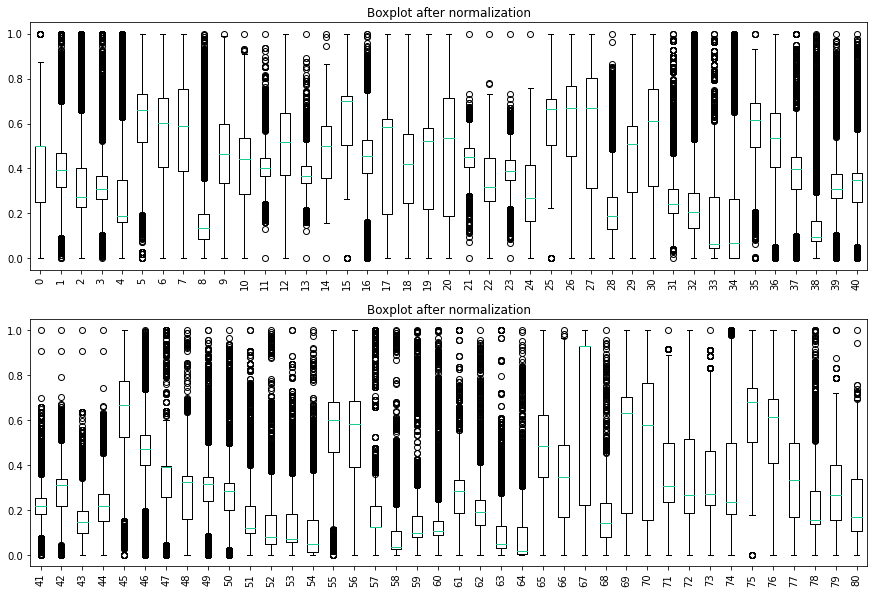

In [5]:
split = 41
endr = len(sup.columns) - 1

fig = plt.figure()
fig.subplots_adjust(hspace=2.0)
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(2, 1, 1)
ax1.set_title("Boxplot after normalization")
ax1.boxplot(sup.iloc[:,0:split],labels=range(0,split),medianprops=dict(color="#1ACC94"))
ax1.set_xticklabels(labels=range(0,split), rotation=90)
ax2 = fig.add_subplot(2, 1, 2)
ax2.set_title("Boxplot after normalization")
ax2.boxplot(sup.iloc[:,split:endr],labels=range(split,endr),medianprops=dict(color="#1ACC94"))
ax2.set_xticklabels(labels=range(split,endr), rotation=90)
fig.savefig('../graph/Box_norm.jpg', dpi=150)

<Figure size 432x288 with 0 Axes>

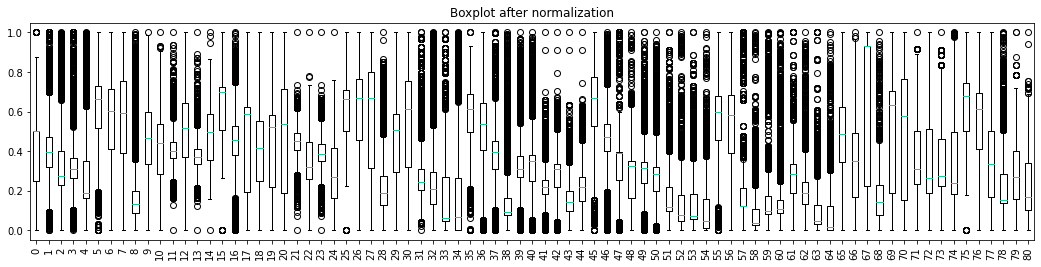

In [6]:
endr = len(sup.columns) - 1

fig = plt.figure()
fig.subplots_adjust(hspace=2.0)
fig = plt.figure(figsize=(18,4))
ax1 = fig.add_subplot(1, 1, 1)
ax1.set_title("Boxplot after normalization")
ax1.boxplot(sup.iloc[:,0:endr],labels=range(0,endr),medianprops=dict(color="#1ACC94"))
ax1.set_xticklabels(labels=range(0,endr), rotation=90)
fig.savefig('../graph/Box_norm_one.jpg', dpi=150)

## Display color coded absolute value correlation matrix

In [7]:
crmx = sup.corr().abs()
crmx.style.background_gradient(cmap='YlOrRd')

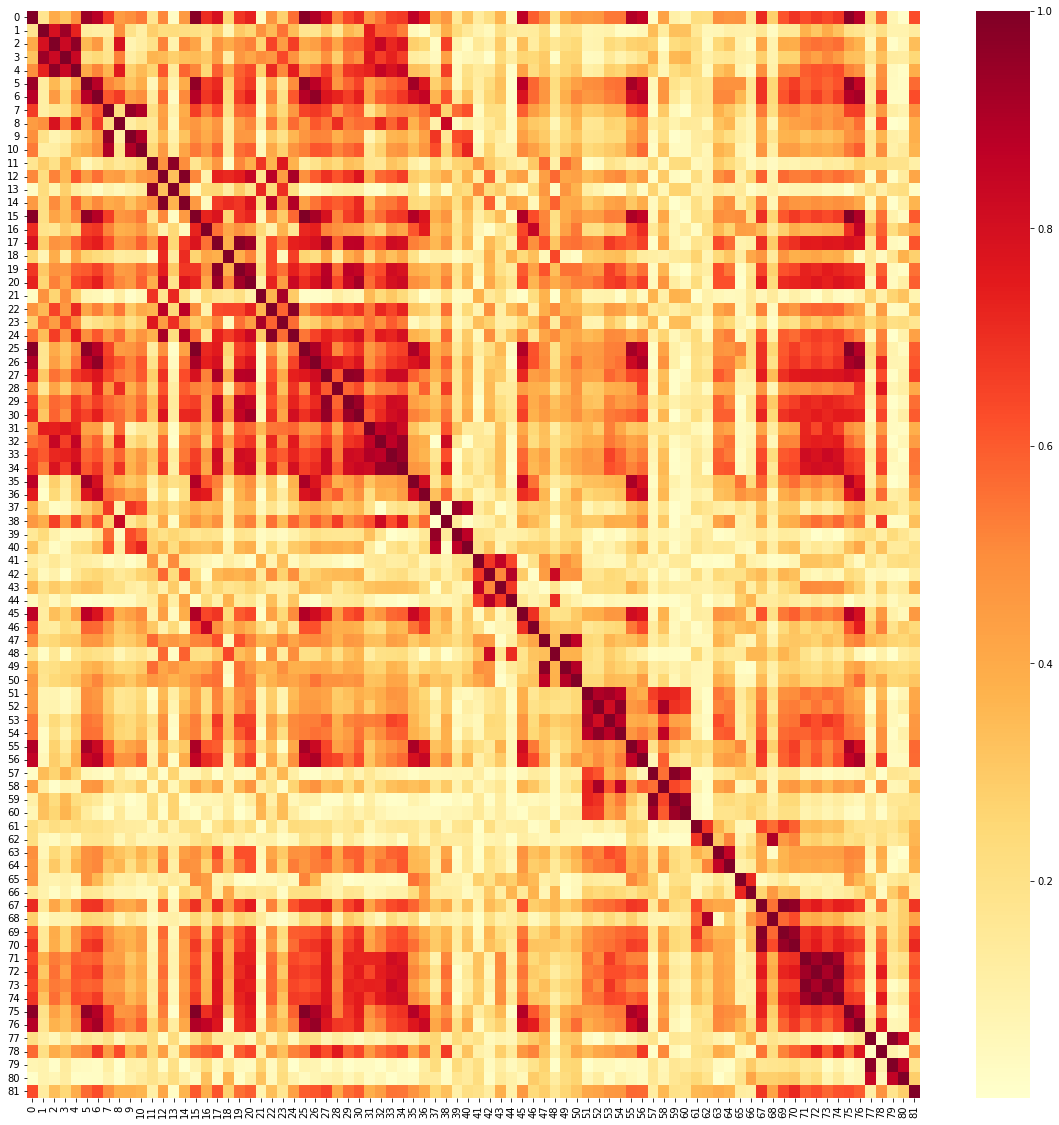

In [8]:
colnum = list(range(0,len(crmx.columns)))

fig = plt.figure(figsize=(20,20))
ax = sns.heatmap(crmx, cmap='YlOrRd', xticklabels=colnum, yticklabels=colnum)
ax.set_xticklabels(labels=colnum, rotation=90)
ax.set_yticklabels(labels=colnum, rotation=0)
fig.savefig('../graph/Corr_norm_heatmap.jpg', dpi=150)

## Display color coded absolute value correlation matrix of selected attributes

Each property has 10 statistical mesures. Selecting one property as a starting point (ix = [i+j*10 for i in range(1,11) with j between 0 and 7)

Alternatively select the same statistical measure for each property (ix = [i+j for i in range(1,81,10) with j between 0 and 7)

In [9]:
ix = [i for i in range(1,81,10)]
ix.append(-1)
sup.iloc[:,ix].corr().abs().style.background_gradient(cmap='YlOrRd')

,mean_atomic_mass,mean_fie,mean_atomic_radius,mean_Density,mean_ElectronAffinity,mean_FusionHeat,mean_ThermalConductivity,mean_Valence,critical_temp
mean_atomic_mass,1.000000,0.283750,0.482093,0.745265,0.084763,0.073817,0.159197,0.377000,0.130515
mean_fie,0.283750,1.000000,0.690042,0.168430,0.473643,0.018685,0.048490,0.102932,0.108376
mean_atomic_radius,0.482093,0.690042,1.000000,0.348411,0.377169,0.081011,0.007515,0.064095,0.078528
mean_Density,0.745265,0.168430,0.348411,1.000000,0.151412,0.352488,0.059334,0.725898,0.386230
mean_ElectronAffinity,0.084763,0.473643,0.377169,0.151412,1.000000,0.095544,0.008616,0.321017,0.192513
mean_FusionHeat,0.073817,0.018685,0.081011,0.352488,0.095544,1.000000,0.070762,0.550961,0.409616
mean_ThermalConductivity,0.159197,0.048490,0.007515,0.059334,0.008616,0.070762,1.000000,0.342797,0.354339
mean_Valence,0.377000,0.102932,0.064095,0.725898,0.321017,0.550961,0.342797,1.000000,0.599894
critical_temp,0.130515,0.108376,0.078528,0.386230,0.192513,0.409616,0.354339,0.599894,1.000000


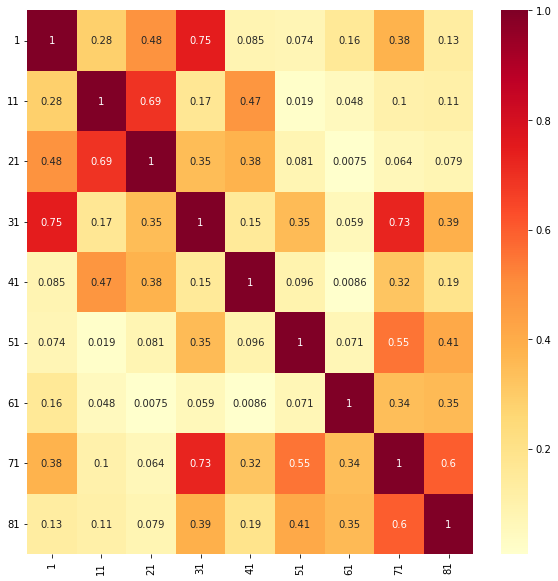

In [10]:
colnum = [list(sup.columns).index(i) for i in sup.iloc[:,ix].columns]

fig = plt.figure(figsize=(10,10))
ax = sns.heatmap(sup.iloc[:,ix].corr().abs(), cmap='YlOrRd', annot=True, xticklabels=colnum, yticklabels=colnum)
ax.set_xticklabels(labels=colnum, rotation=90)
ax.set_yticklabels(labels=colnum, rotation=0)
fig.savefig('../graph/Corr_norm_select_heatmap_means.jpg', dpi=150)

## Display scatter matrix for selected attributes plus target

Display of all 82 attributes exceeds computing resources

Each property has 10 statistical mesures. Selecting one property as a starting point (ix = [i+j*10 for i in range(1,11) with j between 0 and 7)

Alternatively select the same statistical measure for each property (ix = [i+j for i in range(1,81,10) with j between 0 and 7)

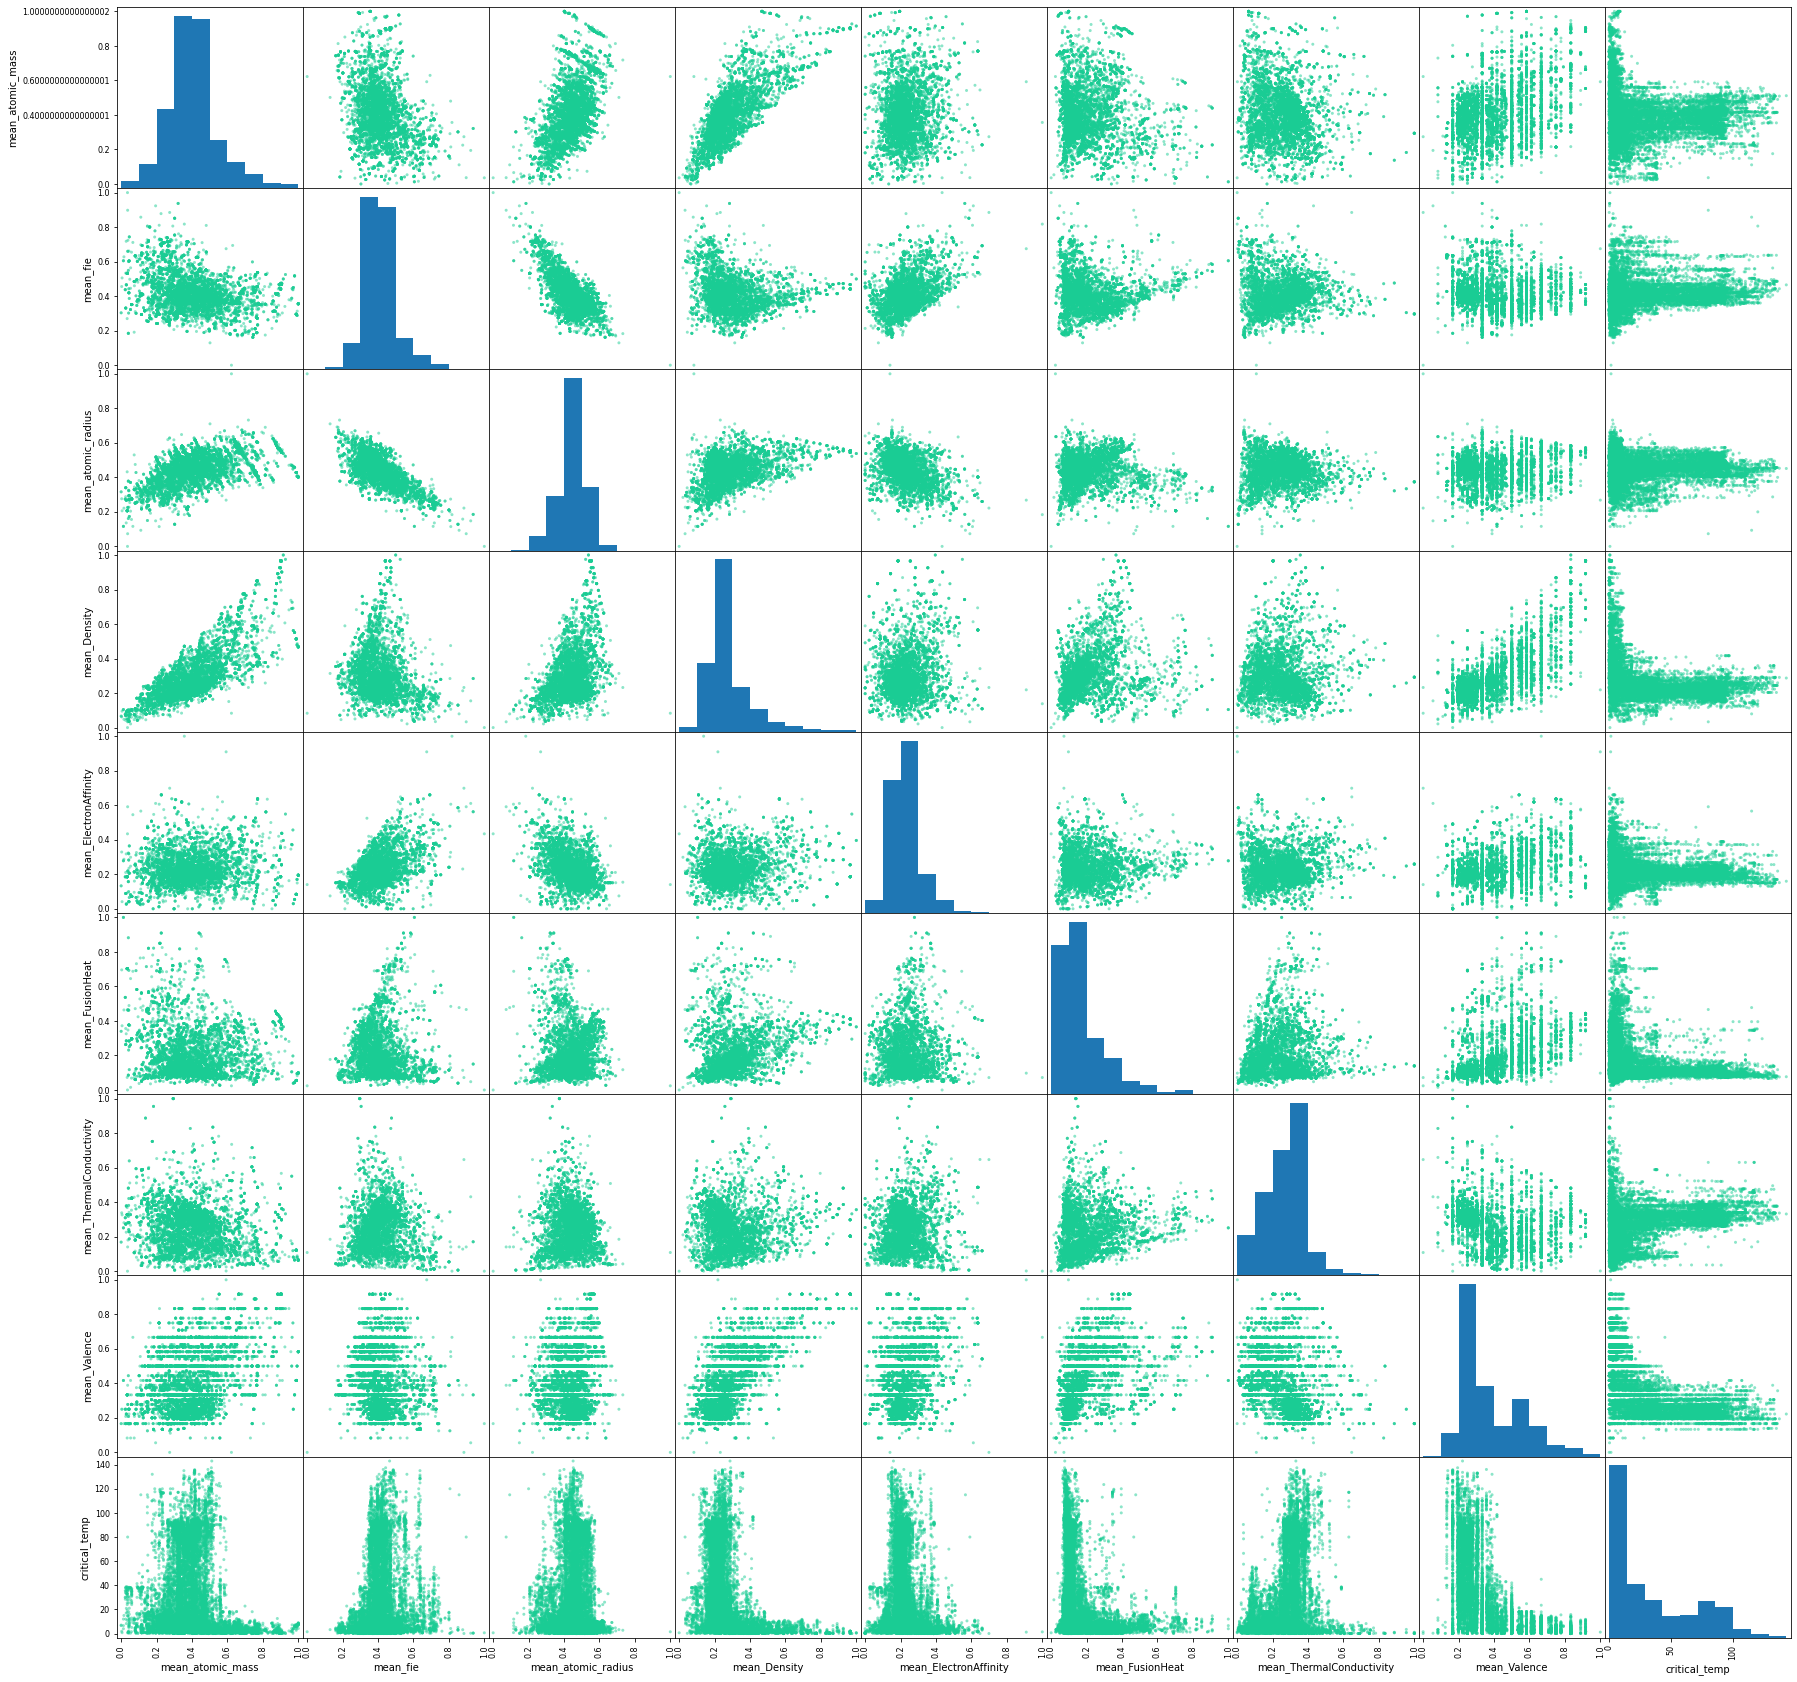

In [11]:
pd.plotting.scatter_matrix(sup.iloc[:,ix], figsize=(30,30), c="#1ACC94")
plt.savefig('../graph/Scatter_norm_select_means.jpg', dpi=150)

## Display PPS Matrix

In [12]:
pps.matrix(sup.iloc[:,ix], output='list', sample=0)

[{'x': 'mean_atomic_mass',
  'y': 'mean_atomic_mass',
  'ppscore': 1,
  'case': 'predict_itself',
  'is_valid_score': True,
  'metric': None,
  'baseline_score': 0,
  'model_score': 1,
  'model': None},
 {'x': 'mean_atomic_mass',
  'y': 'mean_fie',
  'ppscore': 0.7972191642859021,
  'case': 'regression',
  'is_valid_score': True,
  'metric': 'mean absolute error',
  'baseline_score': 0.06310081182204776,
  'model_score': 0.012795635355512869,
  'model': DecisionTreeRegressor()},
 {'x': 'mean_atomic_mass',
  'y': 'mean_atomic_radius',
  'ppscore': 0.8341866020330104,
  'case': 'regression',
  'is_valid_score': True,
  'metric': 'mean absolute error',
  'baseline_score': 0.05863685898867207,
  'model_score': 0.009722776835022935,
  'model': DecisionTreeRegressor()},
 {'x': 'mean_atomic_mass',
  'y': 'mean_Density',
  'ppscore': 0.8693853856115085,
  'case': 'regression',
  'is_valid_score': True,
  'metric': 'mean absolute error',
  'baseline_score': 0.08242206424344632,
  'model_score':

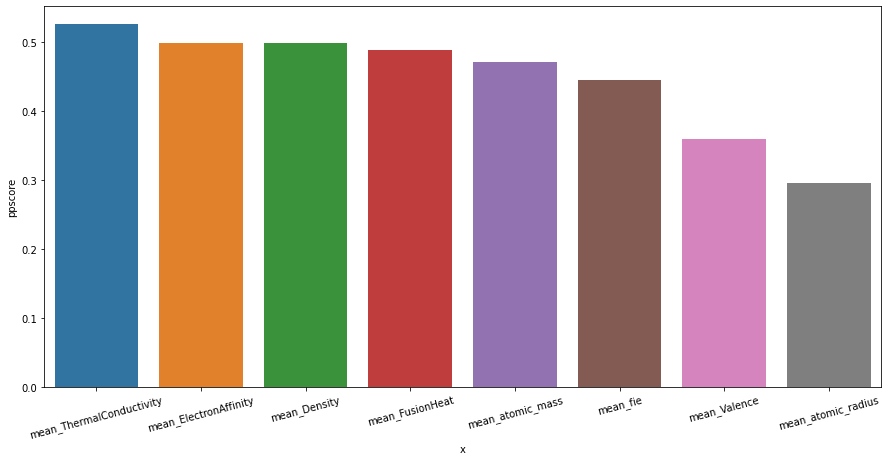

In [13]:
predictors_df = pps.predictors(sup.iloc[:,ix], y="critical_temp")
fig = plt.figure(figsize=(15,7))
sns.barplot(data=predictors_df, x="x", y="ppscore")
plt.xticks(rotation=15)
plt.savefig('../graph/PPS_norm_predictors_means.jpg', dpi=150)

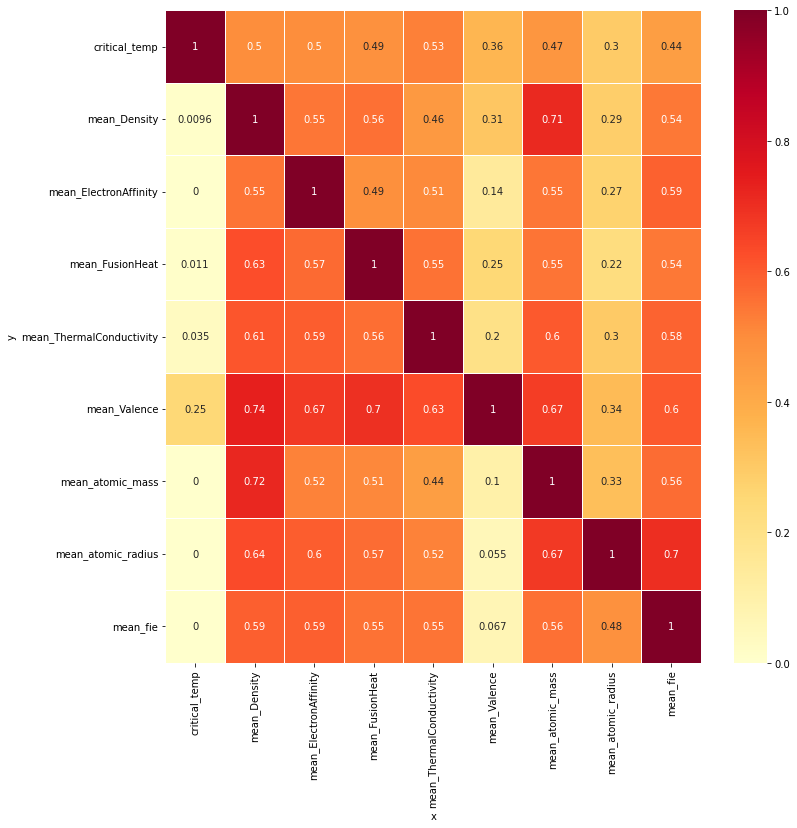

In [14]:
matrix_df = pps.matrix(sup.iloc[:,ix])[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
fig = plt.figure(figsize=(12,12))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="YlOrRd", linewidths=0.5, annot=True)
plt.savefig('../graph/PPS_norm_matrix_means.jpg', dpi=150)

In [15]:
end = time.time()
runtime = end - start
print(f"Runtime = {runtime:.2f} s")

Runtime = 139.59 s
